In [107]:
import numpy as np
import scipy.stats as st
from astropy.io import fits,ascii
from astropy.time import Time
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='serif')

import palettable

%matplotlib inline



In [95]:
###generate test array of luminosities and times

v_lx=np.abs(np.random.uniform(0, 80, 10))
v_times=np.array([5, 10, 23, 34, 46, 57, 68, 70, 81, 94])

##generating random upper and lower error bars because it's like the data
v_err_low=np.abs(np.random.uniform(0, 5, 10))
v_err_high=np.abs(np.random.uniform(0, 5, 10))


Text(0,0.5,'fake luminosities')

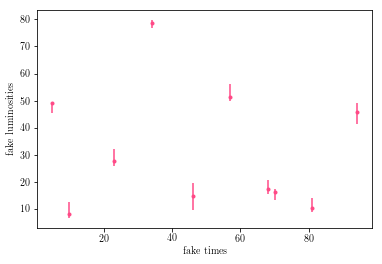

In [96]:
plt.errorbar(v_times, v_lx, yerr=[v_err_low, v_err_high], fmt='.', color=palettable.cubehelix.cubehelix3_16.mpl_colors[9])
plt.xlabel('fake times')
plt.ylabel('fake luminosities')

In [97]:
##first we need to even out the error bars. 

##making an empty array
v_err=np.zeros(v_err_low.size)

#compare upper and lower error bars and fill v_err with the higher value at each index
for i in range(v_err_low.size):
    
    v_err[i]=np.maximum(v_err_low[i], v_err_high[i])

Text(0,0.5,'fake luminosities')

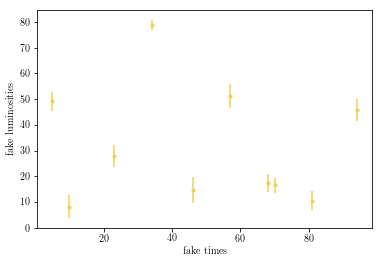

In [98]:
plt.errorbar(v_times, v_lx, yerr=v_err, fmt='.', color=palettable.cubehelix.cubehelix3_16.mpl_colors[12])
plt.xlabel('fake times')
plt.ylabel('fake luminosities')

Text(0,0.5,'fake luminosities')

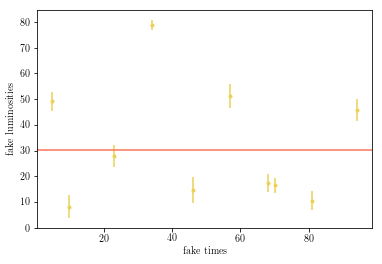

In [99]:
##next we need to take a weighted average, using the errors as the weights
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.average.html

wg_mean=np.average(v_lx, weights=v_err)

plt.errorbar(v_times, v_lx, yerr=v_err, fmt='.', color=palettable.cubehelix.cubehelix3_16.mpl_colors[12])
plt.axhline(y=wg_mean,  color=palettable.cubehelix.cubehelix3_16.mpl_colors[10])
plt.xlabel('fake times')
plt.ylabel('fake luminosities')

In [100]:
##to quantify variability, we want to compute the chi squared of each value compared to the straight line fit above. 

#fill an array the same length as our data points with the new value
mn_lx=np.full((v_lx.size), wg_mean)

##to compute chi squared:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
st.chisquare(v_lx, f_exp=mn_lx)

Power_divergenceResult(statistic=161.72850751994176, pvalue=3.2476822918992975e-30)

A small chi squared means that the observed data fits the model (which in this case is non variability) well. 
The large value from the example above means that this data is pretty variable!

In [101]:
##okay but let's test this on fake data that doesn't vary....
###generate test array of luminosities and times

v_lx_no=np.abs(np.random.uniform(77, 80, 10))


##generating random upper and lower error bars because it's like the data
v_err_low_no=np.abs(np.random.uniform(0, 3, 10))
v_err_high_no=np.abs(np.random.uniform(0, 3, 10))


Text(0,0.5,'fake luminosities')

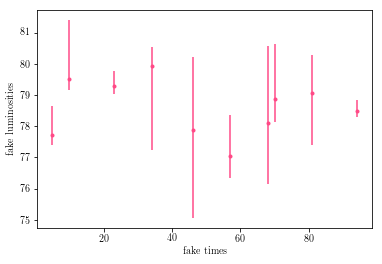

In [102]:
plt.errorbar(v_times, v_lx_no, yerr=[v_err_low_no, v_err_high_no], fmt='.', color=palettable.cubehelix.cubehelix3_16.mpl_colors[9])
plt.xlabel('fake times')
plt.ylabel('fake luminosities')

In [103]:
#let's even out the errors again


v_err_no=np.zeros(v_err_low_no.size)

#compare upper and lower error bars and fill v_err with the higher value at each index
for i in range(v_err_low_no.size):
    
    v_err_no[i]=np.maximum(v_err_low_no[i], v_err_high_no[i])

Text(0,0.5,'fake luminosities')

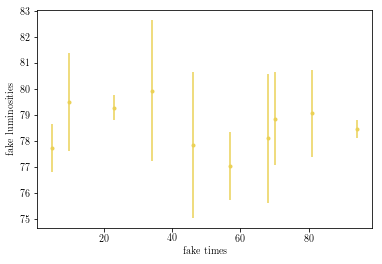

In [104]:
plt.errorbar(v_times, v_lx_no, yerr=v_err_no, fmt='.', color=palettable.cubehelix.cubehelix3_16.mpl_colors[12])
plt.xlabel('fake times')
plt.ylabel('fake luminosities')

Text(0,0.5,'fake luminosities')

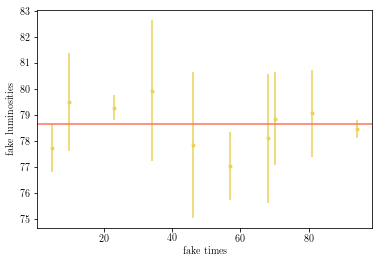

In [105]:


wg_mean_no=np.average(v_lx_no, weights=v_err_no)

plt.errorbar(v_times, v_lx_no, yerr=v_err_no, fmt='.', color=palettable.cubehelix.cubehelix3_16.mpl_colors[12])
plt.axhline(y=wg_mean_no,  color=palettable.cubehelix.cubehelix3_16.mpl_colors[10])
plt.xlabel('fake times')
plt.ylabel('fake luminosities')

In [106]:
##to quantify variability, we want to compute the chi squared of each value compared to the straight line fit above. 

#fill an array the same length as our data points with the new value
mn_lx_no=np.full((v_lx_no.size), wg_mean_no)

##to compute chi squared:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
st.chisquare(v_lx_no, f_exp=mn_lx_no)

Power_divergenceResult(statistic=0.09334602867561839, pvalue=0.9999999811476278)

This is a much lower chi squared value, showing how much less variable the data is!